TMDB Box Office Prediction

In this dataset, you are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

You are predicting the worldwide revenue for 4398 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(3000, 23)
(4398, 22)


In [4]:
train.head(2)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


Check Quality of data

In [5]:
train.columns[train.isnull().any()]

Index(['belongs_to_collection', 'genres', 'homepage', 'overview',
       'poster_path', 'production_companies', 'production_countries',
       'runtime', 'spoken_languages', 'tagline', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [6]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [7]:
train.drop(columns=['homepage','original_title','overview','poster_path','production_countries'],inplace=True)
train.drop(columns=['spoken_languages','tagline','Keywords'],inplace=True)

In [8]:
train[train['status']=='Rumored']

,id,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,release_date,runtime,status,title,cast,crew,revenue
609,610,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",tt0120254,en,5.121309,NaN,1/1/97,71.0,Rumored,The Swan Princess: Escape from Castle Mountain,"[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644
1007,1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",tt1860180,en,0.007877,NaN,2/5/11,60.0,Rumored,Billy Gardell: Halftime,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60
1216,1217,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",tt0091024,en,10.273979,"[{'name': 'Atlantic Entertainment Group', 'id'...",8/22/86,89.0,Rumored,Extremities,"[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091
1618,1619,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",tt0145394,en,0.179246,NaN,2/20/98,89.0,Rumored,A Place Called Chiapas,"[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000


In [9]:
train.drop([609,1007,1216,1618],inplace=True)

In [10]:
train[train['status']=='Rumored'].shape

(0, 15)

In [11]:
train.drop(columns=['status'],inplace=True)

In [12]:
train.head()

,id,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,release_date,runtime,title,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",10/10/14,105.0,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,3.174936,NaN,3/9/12,122.0,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,2/5/09,118.0,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [13]:
train.columns[train.isnull().any()]

Index(['belongs_to_collection', 'genres', 'production_companies', 'runtime',
       'cast', 'crew'],
      dtype='object')

In [14]:
numeric_cols = ['id','budget','popularity','runtime','revenue']
categorical_cols = ['original_language']
object_cols = ['belongs_to_collection','genres','production_companies','title','cast','crew','imdb_id','release_date',]

In [15]:
train.shape

(2996, 14)

-0.0013552136805656289

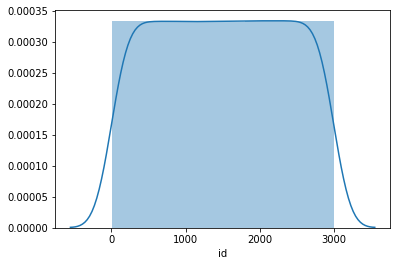

In [16]:
sns.distplot(train["id"])
train['id'].skew()

In [17]:
#train['belongs_to_collection'].unique()

In [18]:
train[(train['belongs_to_collection'].isnull())].shape

(2393, 14)

In [19]:
train['belongs_to_collection'].fillna(0,inplace=True)

In [20]:
train[(train['belongs_to_collection'].isnull()) & (train['budget'] ==0)].shape

(0, 14)

In [21]:
train.loc[train['id'] == 1865,'revenue'] = 25000000  
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000 
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000          
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [22]:
#for i, e in enumerate(train['belongs_to_collection'][:2]):
#print(i, e)

3.0944127853291667

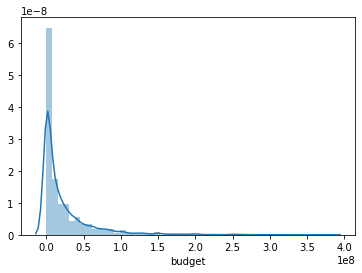

In [23]:
sns.distplot(train["budget"])
train['budget'].skew()

In [24]:
train['budget'].unique()

array([ 14000000,  40000000,   3300000,   1200000,         0,   8000000,
         6000000,   1000000,  15000000,  53000000, 102000000,    500000,
        26000000,  32000000,  80000000,   4000000,  10000000,  11000000,
        45000000,  13000000,  90000000, 140000000,  30000000,  50000000,
         3800000,   3000000,  25000000,   3906840,  44000000,  38000000,
          560000,  12000000,  20000000, 125000000, 150000000,   5000000,
         1500000,   2000000,  85000000,  29000000,    445000,  17000000,
        10284523,  43000000,  28000000,   7500000,  35000000,   2500000,
        10500000,   7000000,  60000000,  10900000,  31000000,  72000000,
        75000000, 100000000,  93000000,  12716953,  18000000,   2400000,
        65000000,   9000000, 110000000,  14320000,   3500000,  39200000,
        63600000,    125000,  19000000,  12468389,  82500000,    259000,
       180000000,   4500000,  24000000,  12600000,  55000000,   3200000,
        22000000,   6700000,   2600000,  49000000, 

In [25]:
train[(train['budget']==0)].shape

(793, 14)

In [26]:
train[(train['budget']==0)].head()

,id,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,release_date,runtime,title,cast,crew,revenue
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,1.148070,NaN,2/5/09,118.0,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
7,8,0,0,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,1.949044,NaN,1/15/04,84.0,Control Room,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2/16/96,100.0,Muppet Treasure Island,"[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
11,12,"[{'id': 48190, 'name': 'Revenge of the Nerds C...",0,"[{'id': 35, 'name': 'Comedy'}]",tt0093857,en,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,7/10/87,98.0,Revenge of the Nerds II: Nerds in Paradise,"[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033
17,18,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",tt1700845,en,4.183558,"[{'name': 'BBC Films', 'id': 288}, {'name': 'H...",12/25/13,111.0,The Invisible Woman,"[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254


In [27]:
train[(train['budget']<13)].shape

(809, 14)

In [28]:
train['popularity'].unique()

array([ 6.575393,  8.248895, 64.29999 , ..., 14.482345, 15.725542,
       10.512109])

14.374133463932882

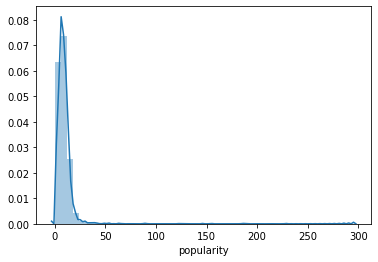

In [29]:
sns.distplot(train["popularity"])
train['popularity'].skew()

In [30]:
train['popularity']=train['popularity'].astype(int)

In [31]:
train['popularity'].unique()

array([  6,   8,  64,   3,   1,   0,   7,   4,  14,  10,  20,  13,  11,
        12,  16,   5,   9,   2,  17,  23,  25,  18,  32,  19,  21,  15,
        28,  26,  27, 294,  29,  30, 287,  24,  49,  41,  89,  39, 154,
        37,  22,  33, 123, 228, 146,  54,  51,  53,  47, 185,  31,  88,
       187,  63,  34,  36,  42], dtype=int64)

In [32]:
train.isnull().sum()

id                         0
belongs_to_collection      0
budget                     0
genres                     7
imdb_id                    0
original_language          0
popularity                 0
production_companies     153
release_date               0
runtime                    2
title                      0
cast                      13
crew                      16
revenue                    0
dtype: int64

In [33]:
train['runtime'].unique()

array([ 93., 113., 105., 122., 118.,  83.,  92.,  84., 100.,  91., 119.,
        98., 145.,  97.,  85., 111.,  96.,  87., 130.,  95., 116., 110.,
        89., 112., 117., 106., 125.,  94., 127.,  90., 123., 126., 108.,
        88., 167., 102., 160., 107., 144., 124., 115., 133., 129., 104.,
       103., 157., 109., 135., 147.,  72., 158., 120., 121., 177., 189.,
       178.,  86.,  79., 176., 101.,  99.,  74., 141.,  65., 136., 143.,
       132.,  53., 139., 114., 140., 156., 148., 137., 168., 154.,  77.,
        76., 163.,   0., 155.,  82., 150., 149., 170.,  80., 152., 128.,
       131., 220., 181., 179., 180.,  81., 161., 162., 134., 193., 188.,
       212., 142., 146., 151., 171.,  75.,  40., 165.,  78., 185., 138.,
       153.,  71., 175., 338., 219.,  nan, 183.,  73., 186., 199.,  68.,
       214., 248., 159., 207., 187., 197., 164., 169., 172.,  66.,  63.,
       213.,  62.,  11., 174.,  69., 191., 182.])

In [34]:
#train['runtime']=train['runtime'].astype(int)

In [35]:
train[(train['runtime'].isnull())]

,id,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,release_date,runtime,title,cast,crew,revenue
1335,1336,0,6000000,"[{'id': 18, 'name': 'Drama'}]",tt1107828,ru,0,NaN,10/29/07,NaN,Королёв,"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",31000
2302,2303,0,0,"[{'id': 35, 'name': 'Comedy'}]",tt0116485,de,0,"[{'name': 'Senator Film Produktion', 'id': 191}]",3/14/96,NaN,Happy Weekend,"[{'cast_id': 0, 'character': 'Joachim Krippo',...",NaN,65335


In [36]:
train.drop([2302],inplace=True)

In [37]:
train['runtime'].fillna(130,inplace=True)

1.0203227300420965

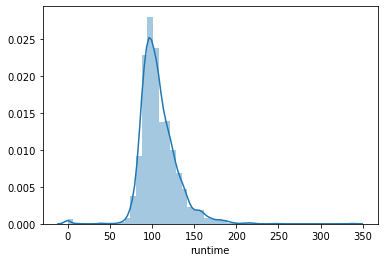

In [38]:
sns.distplot(train["runtime"])
train['runtime'].skew()

4.54133758237584

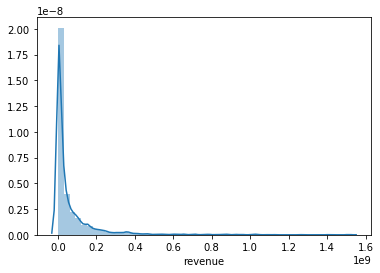

In [39]:
sns.distplot(train["revenue"])
train['revenue'].skew()

In [40]:
train['revenue'].unique()

array([ 12314651,  95149435,  13092000, ...,  89456761, 171963386,
        82087155], dtype=int64)

In [41]:
if 'genres' in train:
    train_genres = train['genres'].str.extractall('([A-Z]\w{0,})')
    train_genres = train_genres.unstack(level=1,fill_value='Not Found')
    train_genres.columns = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'genres_6', 'genres_7', 'genres_8']
train_genres.head(3)



,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8
0,Comedy,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
1,Comedy,Drama,Family,Romance,Not Found,Not Found,Not Found,Not Found
2,Drama,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found


In [42]:
if 'genres' in train:
    train = train.drop(['genres'], axis=1)

if train_genres['genres_1'].isna().any():
    train_genres[train_genres['genres_1'].isnull()]
    
if len(train_genres) > 0:
    train = pd.concat([train, train_genres], axis =1)
    train.dropna()
train.head(2)

,id,belongs_to_collection,budget,imdb_id,original_language,popularity,production_companies,release_date,runtime,title,...,crew,revenue,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,tt2637294,en,6,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93.0,Hot Tub Time Machine 2,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,tt0368933,en,8,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113.0,The Princess Diaries 2: Royal Engagement,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,Drama,Family,Romance,Not Found,Not Found,Not Found,Not Found


In [43]:
train[(train['genres_1'].isnull())]

,id,belongs_to_collection,budget,imdb_id,original_language,popularity,production_companies,release_date,runtime,title,...,crew,revenue,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8
470,471,0,2000000,tt0349159,en,0,NaN,9/12/03,120.0,"The Book of Mormon Movie, Volume 1: The Journey",...,NaN,1672730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,1623,0,400000,tt0261755,en,0,NaN,7/26/01,97.0,Jackpot,...,"[{'credit_id': '52fe4d3c9251416c9110f319', 'de...",43719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1814,1815,0,2700000,tt0110289,it,0,NaN,10/1/94,117.0,"Ryaba, My Chicken",...,"[{'credit_id': '52fe4c139251416c910eeee3', 'de...",4635143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,1820,0,0,tt0352622,ru,0,NaN,9/2/02,91.0,Sky. Plane. Girl.,...,"[{'credit_id': '52fe4728c3a368484e0b7f53', 'de...",314195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2423,2424,0,500000,tt0984177,en,0,NaN,8/25/99,157.0,Amarkalam,...,"[{'credit_id': '53b42af80e0a26598c00cea3', 'de...",500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2686,2687,0,0,tt0833448,ru,0,NaN,7/1/06,88.0,Lift,...,"[{'credit_id': '57b8a5d19251411bc6000587', 'de...",123182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900,2901,0,200000,tt1766044,en,0,NaN,11/1/12,100.0,Rita's Last Fairy Tale,...,"[{'credit_id': '52fe4ab89251416c750ebaab', 'de...",486937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
train[(train['genres_1']=='Not Found')].shape

(0, 21)

In [45]:
train.drop([470,1622,1814,1819,2423,2686,2900],inplace=True)

In [46]:
train.drop(columns=['genres_2','genres_3','genres_4','genres_5','genres_6','genres_7','genres_8'],inplace=True)
train.drop(columns=['production_companies','belongs_to_collection','cast','crew','title','imdb_id'],inplace=True)

In [47]:
train.head(3)

,id,budget,original_language,popularity,release_date,runtime,revenue,genres_1
0,1,14000000,en,6,2/20/15,93.0,12314651,Comedy
1,2,40000000,en,8,8/6/04,113.0,95149435,Comedy
2,3,3300000,en,64,10/10/14,105.0,13092000,Drama


In [48]:
train[(train['budget'] == 0) & (train['revenue'] == 0)].shape

(0, 8)

In [49]:
train[(train['budget'] == 0) & (train['revenue'] >= 1)].shape

(790, 8)

In [50]:

train[(train['budget']==0) & (train['popularity'] <= 8.248895)].shape

(665, 8)

In [51]:
train[(train['budget']==0) & (train['original_language'] =='en')].shape

(613, 8)

In [52]:
train['release_date'] = pd.to_datetime(train['release_date'])

In [53]:
train['Year'] = train['release_date'].dt.year
train['Month'] = train['release_date'].dt.month
train['Day'] = train['release_date'].dt.day
train['dayOfWeek'] = train['release_date'].dt.day_name()

train.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,genres_1,Year,Month,Day,dayOfWeek
0,1,14000000,en,6,2015-02-20,93.0,12314651,Comedy,2015,2,20,Friday
1,2,40000000,en,8,2004-08-06,113.0,95149435,Comedy,2004,8,6,Friday
2,3,3300000,en,64,2014-10-10,105.0,13092000,Drama,2014,10,10,Friday
3,4,1200000,hi,3,2012-03-09,122.0,16000000,Thriller,2012,3,9,Friday
4,5,0,ko,1,2009-02-05,118.0,3923970,Action,2009,2,5,Thursday


In [54]:
train[(train['budget'] == 0) & (train['revenue'] <100000)].shape

(141, 12)

In [55]:
train['revenue'].median()

16977278.5

In [56]:
train[(train['budget'] == 0) & (train['revenue'] >= 100000000) ].shape

(2, 12)

In [57]:
x=train[(train['budget'] > 0) & (train['revenue'] >= 100000000)]

In [58]:
x['budget'].mean()

69704145.09803921

In [59]:
train.loc[(train['budget'] == 0) & (train['revenue'] >= 100000000),'budget']=69704145.09803921

In [60]:
train[(train['budget'] == 0) & (train['revenue'] >= 10000000) ].shape

(210, 12)

In [61]:
y=train[(train['budget'] >0) & (train['revenue'] >= 10000000) ]

In [62]:
y['budget'].mean()

40652976.93165121

In [63]:
train.loc[(train['budget'] == 0) & (train['revenue'] >= 10000000), 'budget']=40652976.93165121

In [64]:
train[(train['budget'] ==0) & (train['revenue'] <10000000)].shape

(578, 12)

In [65]:
z=train[(train['budget'] >0) & (train['revenue'] <10000000)]

In [66]:
z['budget'].mean()

7953928.13803681

In [67]:
train.loc[(train['budget'] == 0) & (train['revenue'] >= 10000000), 'budget']=40652976.93165121

In [68]:
train.drop(columns=['Year','Month','Day','release_date'],inplace=True)

In [69]:
train['original_language'].unique()

array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
       'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
       'ml', 'bn', 'id'], dtype=object)

In [70]:
train[(train['original_language'] =='en')].shape

(2567, 8)

In [71]:
train.original_language.value_counts()

en    2567
fr      78
ru      45
es      43
hi      42
ja      37
it      23
cn      20
ko      20
zh      19
de      17
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
tr       3
hu       3
pl       2
ml       2
te       2
no       2
fi       2
ur       1
sr       1
nb       1
vi       1
el       1
bn       1
cs       1
ar       1
he       1
id       1
mr       1
Name: original_language, dtype: int64

In [72]:
lang={'en':1, 'hi':5, 'ko':8, 'sr':13, 'fr':2, 'it':7, 'nl':13, 'zh':10, 'es':4, 'cs':13, 'ta':12,
       'cn':9, 'ru':3, 'tr':13, 'ja':6, 'fa':13, 'sv':13, 'de':11, 'te':13, 'pt':13, 'mr':13, 'da':13,
       'fi':13, 'el':13, 'ur':13, 'he':13, 'no':13, 'ar':13, 'nb':13, 'ro':13, 'vi':13, 'pl':13, 'hu':13,
       'ml':13, 'bn':13, 'id':13
    
}

In [73]:
mappedoriginal_language = train['original_language'].map(lang)
train['original_language'] = mappedoriginal_language
train.head()

,id,budget,original_language,popularity,runtime,revenue,genres_1,dayOfWeek
0,1,14000000.0,1,6,93.0,12314651,Comedy,Friday
1,2,40000000.0,1,8,113.0,95149435,Comedy,Friday
2,3,3300000.0,1,64,105.0,13092000,Drama,Friday
3,4,1200000.0,5,3,122.0,16000000,Thriller,Friday
4,5,0.0,8,1,118.0,3923970,Action,Thursday


In [74]:
train.loc[(train['dayOfWeek'] == 'Monday') ,'dayOfWeek'] =0
train.loc[(train['dayOfWeek'] == 'Tuesday') ,'dayOfWeek'] =0
train.loc[(train['dayOfWeek'] == 'Wednesday') ,'dayOfWeek'] =0
train.loc[(train['dayOfWeek'] == 'Thursday') ,'dayOfWeek'] =0
train.loc[(train['dayOfWeek'] == 'Friday') ,'dayOfWeek'] =1
train.loc[(train['dayOfWeek'] == 'Saturday') ,'dayOfWeek'] =1
train.loc[(train['dayOfWeek'] == 'Sunday') ,'dayOfWeek'] =1

In [75]:
train.head()

,id,budget,original_language,popularity,runtime,revenue,genres_1,dayOfWeek
0,1,14000000.0,1,6,93.0,12314651,Comedy,1
1,2,40000000.0,1,8,113.0,95149435,Comedy,1
2,3,3300000.0,1,64,105.0,13092000,Drama,1
3,4,1200000.0,5,3,122.0,16000000,Thriller,1
4,5,0.0,8,1,118.0,3923970,Action,0


In [76]:
Dict ={
    'Comedy':1,
    'Drama': 2,
    'Thriller':3,
    'Action':4,
    'Animation':5,
    'Horror':6,
    'Documentary':7,
    'Adventure':8,
    'Crime':9,
    'Mystery':10,
    'Fantasy':11,
    'War':12,
    'Science':13,
    'Romance':14,
    'Music':15,
    'Western':16,
    'Family':17,
    'History':18,
    'Foreign':19,
    'TV':20
    }

In [77]:
genres = train['genres_1'].map(Dict)
train['genres'] = genres
train.head()

,id,budget,original_language,popularity,runtime,revenue,genres_1,dayOfWeek,genres
0,1,14000000.0,1,6,93.0,12314651,Comedy,1,1
1,2,40000000.0,1,8,113.0,95149435,Comedy,1,1
2,3,3300000.0,1,64,105.0,13092000,Drama,1,2
3,4,1200000.0,5,3,122.0,16000000,Thriller,1,3
4,5,0.0,8,1,118.0,3923970,Action,0,4


In [78]:
train.drop(columns=['genres_1'],inplace=True)

In [79]:
train.head()

,id,budget,original_language,popularity,runtime,revenue,dayOfWeek,genres
0,1,14000000.0,1,6,93.0,12314651,1,1
1,2,40000000.0,1,8,113.0,95149435,1,1
2,3,3300000.0,1,64,105.0,13092000,1,2
3,4,1200000.0,5,3,122.0,16000000,1,3
4,5,0.0,8,1,118.0,3923970,0,4


In [80]:
from sklearn.preprocessing import power_transform
train['budget'] = power_transform(train[['budget']], method='yeo-johnson')
train['budget'].skew()

-0.6966613762560205

In [81]:
train['budget'] = power_transform(train[['budget']], method='yeo-johnson')

In [82]:
from sklearn.preprocessing import power_transform
train['revenue'] = power_transform(train[['revenue']], method='yeo-johnson')
train['revenue'].skew()

-0.07961844159618033

In [83]:
train['revenue'] = power_transform(train[['revenue']], method='yeo-johnson')

In [84]:
targets = train['revenue']
train.drop(columns=['revenue'], inplace=True)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(2091, 7)
(897, 7)


In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [88]:
from sklearn.metrics import mean_squared_error
train_pred = regressor.predict(X_train)
mean_squared_error(y_train, train_pred)

0.06180667712917034

In [89]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.3776101964684705

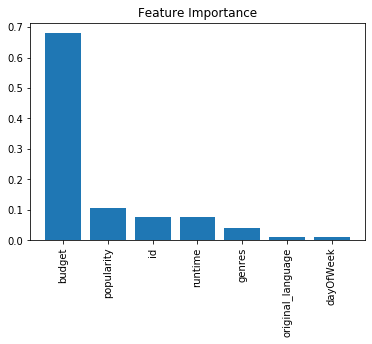

In [90]:
importances =regressor.feature_importances_
#Visalize feature importances
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()